In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv(r"C:\Users\Sounak Banerjee\Dataset.csv")
df.drop(['File No', 'Skewness', 'Kurtosis'], axis=1, inplace=True)
df.drop(df.index[:161], inplace=True)
print(df.head())

     Std deviation  Variance   Maximum   Minimum  Peak-to-Peak  \
161       0.006526  0.000043  0.063630 -0.066377      0.130007   
162       0.008923  0.000080  0.081941 -0.082246      0.164187   
163       0.009641  0.000093  0.087739 -0.081025      0.168765   
164       0.007036  0.000049  0.090181 -0.133211      0.223392   
165       0.006488  0.000042  0.069734 -0.098726      0.168460   

     First Quartile  Second Quartile  Third Quartile       RMS  Signal Energy  \
161       -0.002899        -0.000153        0.002289  0.006530       0.170550   
162       -0.002594         0.000153        0.002289  0.008926       0.318719   
163       -0.002594        -0.000153        0.002289  0.009643       0.371923   
164       -0.002594         0.000153        0.002289  0.007036       0.197998   
165       -0.002594         0.000153        0.002289  0.006490       0.168462   

       Entropy  Label  
161  56.700965      1  
162  59.301324      1  
163  59.390632      1  
164  57.802517      

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df_scaled)
print("\nNormalized Data:\n", df.head())


Normalized Data:
          0         1         2         3         4         5    6         7   \
0  0.083225  0.021499  0.073911  0.775266  0.117580  0.882353  0.6  0.142857   
1  0.157143  0.049990  0.103279  0.706117  0.160198  0.941176  0.8  0.142857   
2  0.179277  0.060241  0.112580  0.711436  0.165906  0.941176  0.6  0.142857   
3  0.098938  0.026815  0.116495  0.484043  0.234018  0.941176  0.8  0.142857   
4  0.082058  0.021119  0.083700  0.634309  0.165525  0.941176  0.8  0.142857   

         8         9         10   11  
0  0.083189  0.021502  0.170684  1.0  
1  0.157102  0.049999  0.196878  1.0  
2  0.179194  0.060231  0.197778  1.0  
3  0.098790  0.026781  0.181780  1.0  
4  0.081952  0.021101  0.154674  1.0  


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[df.columns[11]] = le.fit_transform(df[df.columns[11]])
X = df.drop(df.columns[11], axis=1)
y = df[df.columns[11]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_train:")
print(y_train.head())
print("\ny_test:")
print(y_test.head())

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

X_train:
            0         1         2         3         4         5    6   \
1006  0.010690  0.002134  0.004405  0.984043  0.003805  0.941176  0.6   
256   0.242381  0.093820  0.224670  0.561170  0.296043  0.882353  0.6   
290   0.218036  0.080102  0.192364  0.599734  0.259893  0.882353  0.6   
292   0.078524  0.019985  0.092511  0.746011  0.140411  0.882353  0.6   
2     0.179277  0.060241  0.112580  0.711436  0.165906  0.941176  0.6   

            7         8         9         10  
1006  0.000000  0.010829  0.002165  0.037437  
256   0.142857  0.242309  0.093815  0.213969  
290   0.142857  0.218018  0.080127  0.174563  
292   0.142857  0.078494  0.019991  0.128789  
2     0.142857  0.179194  0.060231  0.197778  

X_test:
            0         1         2         3         4         5    6   \
309   0.112421  0.031696  0.122859  0.654255  0.190259  0.882353  0.6   
1041  0.008580  0.001698  0.006363  1.000000  0.000761  1.000000  0.6   
381   0.044262  0.010038  0.016153  0.9521

LogisticRegression()

In [8]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:\n", accuracy)


Accuracy Score:
 0.9683257918552036


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:\n", accuracy)


Accuracy Score:
 0.995475113122172


In [11]:
import pickle 
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [10]:
data = pd.read_csv(r"C:\Users\Sounak Banerjee\Dataset.csv")
data.drop(['File No'], axis=1, inplace=True)
data.head()

,Std deviation,Variance,Maximum,Minimum,Peak-to-Peak,Skewness,Kurtosis,First Quartile,Second Quartile,Third Quartile,RMS,Signal Energy,Entropy,Label
0,0.012735,0.000162,0.186313,-0.171969,0.358282,-0.532603,63.053427,-0.002594,0.000153,0.002289,0.012735,0.648755,66.006793,1
1,0.007432,0.000055,0.079500,-0.090181,0.169680,0.116528,24.857582,-0.002594,-0.000153,0.002289,0.007433,0.221009,56.099960,1
2,0.007749,0.000060,0.121004,-0.120699,0.241703,0.672325,55.858215,-0.002594,0.000153,0.002594,0.007750,0.240259,59.718305,1
3,0.008704,0.000076,0.083162,-0.090181,0.173342,1.426517,27.900354,-0.002594,-0.000153,0.002289,0.008705,0.303127,57.966060,1
4,0.010849,0.000118,0.134432,-0.141756,0.276188,-0.280880,51.282221,-0.002899,0.000153,0.002289,0.010851,0.470934,61.178621,1


In [11]:
target_column = 'Label'
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])

In [12]:
X = data.drop(target_column, axis=1)
y = data[target_column]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [14]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 18)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=18)

In [15]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:\n", accuracy)


Accuracy Score:
 0.9873817034700315


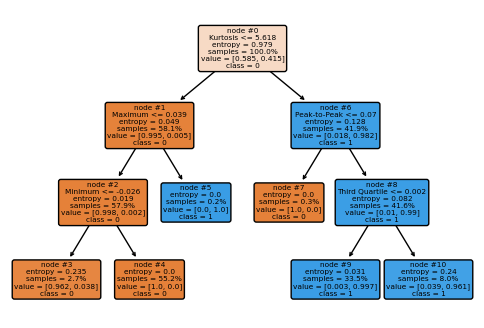

In [16]:
plt.figure(figsize=(6, 4))
plot_tree(clf, feature_names = X.columns.tolist(), class_names = ["0", "1"], filled = True, node_ids = True, impurity = True, proportion=True, rounded=True)
plt.show()

### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
df = pd.read_csv(r"C:\Users\Sounak Banerjee\Dataset.csv")
print(df.head())

   File No  Std deviation  Variance   Maximum   Minimum  Peak-to-Peak  \
0        1       0.012735  0.000162  0.186313 -0.171969      0.358282   
1        2       0.007432  0.000055  0.079500 -0.090181      0.169680   
2        3       0.007749  0.000060  0.121004 -0.120699      0.241703   
3        4       0.008704  0.000076  0.083162 -0.090181      0.173342   
4        5       0.010849  0.000118  0.134432 -0.141756      0.276188   

   Skewness   Kurtosis  First Quartile  Second Quartile  Third Quartile  \
0 -0.532603  63.053427       -0.002594         0.000153        0.002289   
1  0.116528  24.857582       -0.002594        -0.000153        0.002289   
2  0.672325  55.858215       -0.002594         0.000153        0.002594   
3  1.426517  27.900354       -0.002594        -0.000153        0.002289   
4 -0.280880  51.282221       -0.002899         0.000153        0.002289   

        RMS  Signal Energy    Entropy  Label  
0  0.012735       0.648755  66.006793      1  
1  0.007433     

In [19]:
X = df.drop(columns=['File No', 'Label'])
y = df['Label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
k_values = []
accuracies = []

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    knn_pred = knn_model.predict(X_test_scaled)
    knn_accuracy = accuracy_score(y_test, knn_pred)
    k_values.append(k)
    accuracies.append(knn_accuracy)


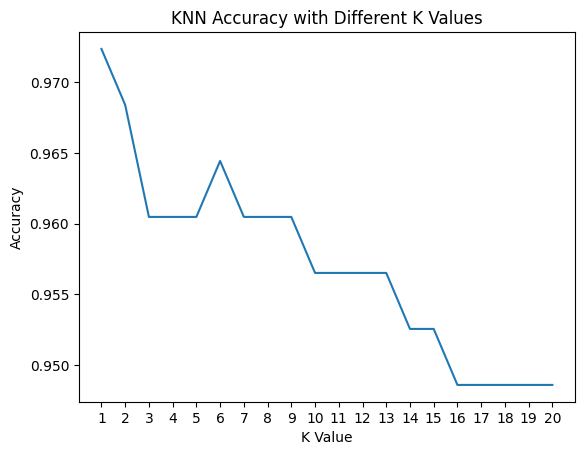

In [23]:
plt.plot(k_values, accuracies)
plt.title('KNN Accuracy with Different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.show()

In [24]:
optimal_k = k_values[accuracies.index(max(accuracies))]
print("\nOptimal K value:", optimal_k)


Optimal K value: 1


### SVM

In [25]:
from sklearn.svm import SVC

In [26]:
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [27]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

In [28]:
svm_accuracy = accuracy_score(y_test, svm_pred)
print("\nSVM Test Accuracy:", svm_accuracy)


SVM Test Accuracy: 0.9723320158102767


### Correlation Matrix


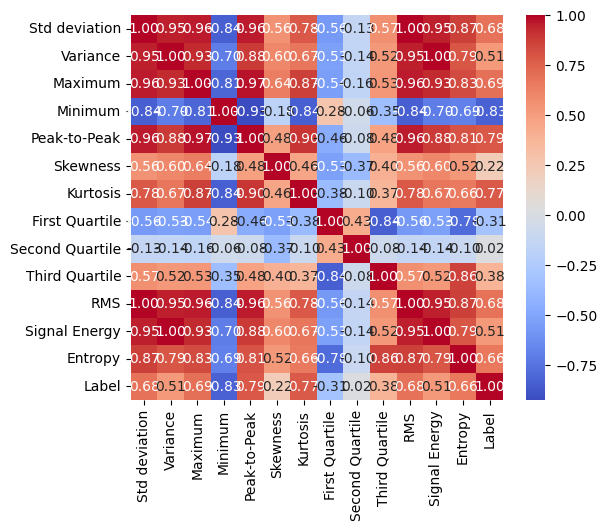

In [29]:
import seaborn as sns
correlation_matrix = df.drop(['File No'], axis=1).corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [30]:
target_corr = correlation_matrix['Label'].abs().sort_values(ascending=False)
print(target_corr)

Label              1.000000
Minimum            0.834928
Peak-to-Peak       0.785841
Kurtosis           0.774745
Maximum            0.694520
Std deviation      0.684726
RMS                0.684437
Entropy            0.662094
Variance           0.512204
Signal Energy      0.512123
Third Quartile     0.375782
First Quartile     0.314526
Skewness           0.220042
Second Quartile    0.015626
Name: Label, dtype: float64


,Description,Value
0,Session id,6473
1,Target,Label
2,Target type,Binary
3,Original data shape,"(1265, 14)"
4,Transformed data shape,"(1265, 14)"
5,Transformed train set shape,"(1012, 14)"
6,Transformed test set shape,"(253, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9941,0.9976,0.9930,0.9931,0.9930,0.9878,0.9880,0.1010
et,Extra Trees Classifier,0.9931,0.9977,0.9906,0.9931,0.9918,0.9858,0.9859,0.0510
rf,Random Forest Classifier,0.9921,0.9977,0.9883,0.9931,0.9906,0.9838,0.9839,0.0670
ada,Ada Boost Classifier,0.9921,0.9970,0.9883,0.9932,0.9906,0.9838,0.9840,0.0500
lightgbm,Light Gradient Boosting Machine,0.9921,0.9986,0.9882,0.9931,0.9905,0.9837,0.9839,0.0920
dt,Decision Tree Classifier,0.9871,0.9860,0.9788,0.9907,0.9846,0.9735,0.9738,0.0100
knn,K Neighbors Classifier,0.9852,0.9938,0.9813,0.9837,0.9824,0.9696,0.9698,0.0210
qda,Quadratic Discriminant Analysis,0.9832,0.9965,0.9976,0.9643,0.9805,0.9658,0.9665,0.0110
nb,Naive Bayes,0.9754,0.9938,0.9672,0.9743,0.9705,0.9493,0.9497,0.0090
lda,Linear Discriminant Analysis,0.9704,0.9916,0.9367,0.9927,0.9635,0.9386,0.9402,0.0120


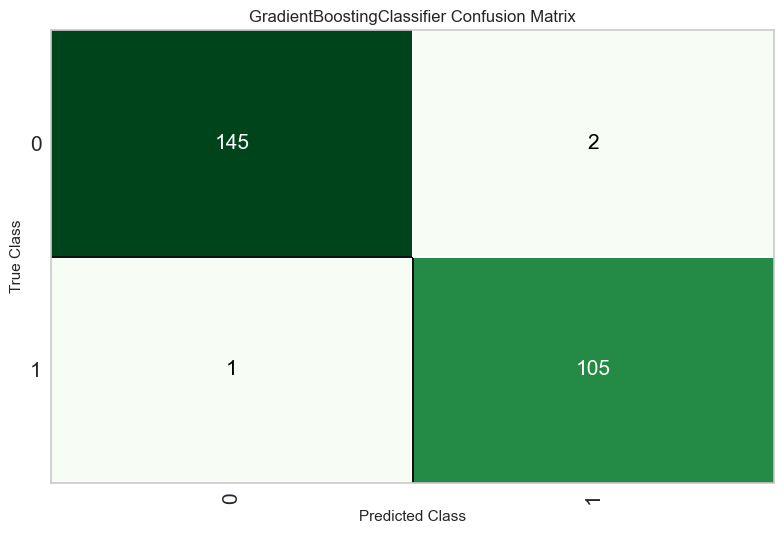

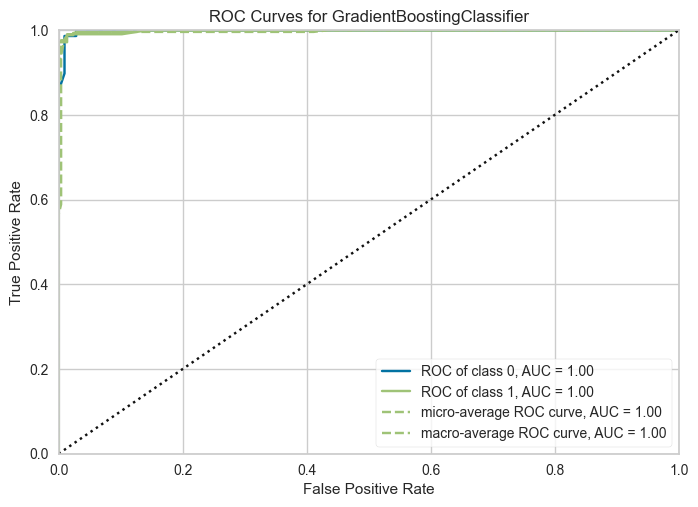

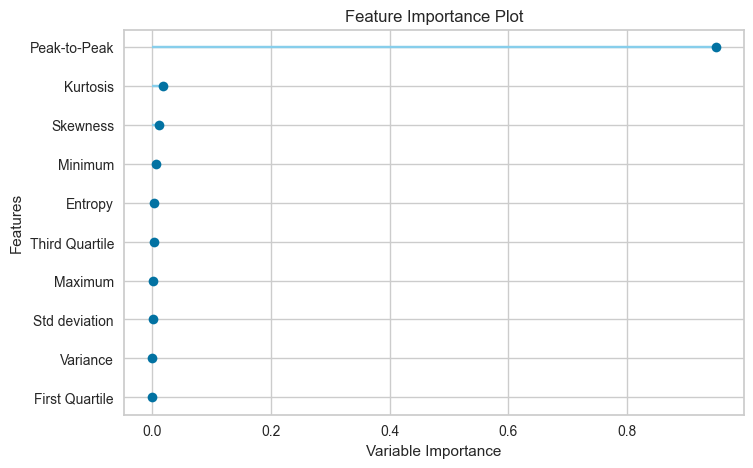

In [33]:
from pycaret.classification import *

file_path = r"C:\Users\Sounak Banerjee\Dataset.csv"
data = pd.read_csv(file_path)
data.drop('File No', axis = 1, inplace=True)
clf_setup = setup(data, target='Label',train_size=0.8)

best_model = compare_models()

# print(best_model)

plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')

plot_model(best_model, plot='feature')
